Classification Report on Test Set:
              precision    recall  f1-score   support

       False       0.97      1.00      0.98     17512
        True       0.93      0.67      0.78      1714

    accuracy                           0.97     19226
   macro avg       0.95      0.83      0.88     19226
weighted avg       0.96      0.97      0.96     19226



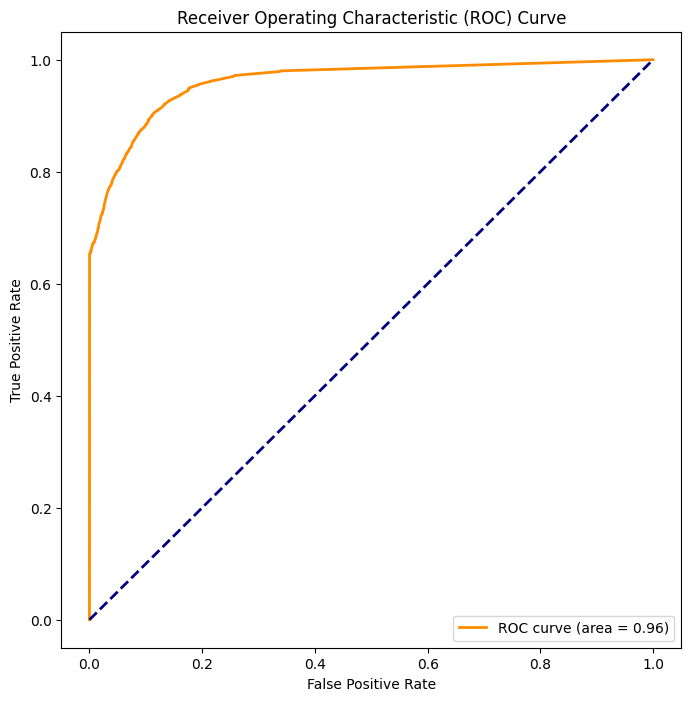

5-fold Cross-Validation AUC Scores: [0.96194683 0.96423846 0.96383879 0.96301254 0.9620106 ]
Mean AUC: 0.9630094420331412


In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')

# Remove duplicate rows in the dataset
df.drop_duplicates(inplace=True)

# Filter out rows with gender 'Other'
df = df[df['gender'] != 'Other']

# Drop the 'smoking_history' column
df.drop(['smoking_history'], axis=1, inplace=True)

# Use pd.get_dummies to one-hot encode remaining categorical columns
df = pd.get_dummies(df, columns=['hypertension', 'heart_disease', 'gender', 'diabetes'], drop_first=True)

# Separate features (X) and target variable (y)
X = df.drop(['diabetes_1'], axis=1)
y = df['diabetes_1']

# Rescale features using Min-Max scaling to ensure uniform scale
scaler = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler.fit_transform(X)
X = pd.DataFrame(data=X_rescaled, columns=X.columns)

# Initialize Random Forest classifier
# n_estimartor gives the number of trees that we wish to create
# Higher the number of trees, higher accuracy but code will run slow
random_forest = RandomForestClassifier(n_estimators=200, random_state=21)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Build the Random Forest model using the training data
random_forest.fit(X_train, y_train)

# Predict values on the test set
y_pred = random_forest.predict(X_test)

# Print classification report to evaluate model performance
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred))

# Get predicted probabilities for positive class
y_prob = random_forest.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Apply k-fold cross-validation using KFold
k_folds = 5 
kf = KFold(n_splits=k_folds, shuffle=True, random_state=21)

# Perform cross-validation and print the results
cv_results = cross_val_score(random_forest, X, y, cv=kf, scoring='roc_auc')
print(f"{k_folds}-fold Cross-Validation AUC Scores: {cv_results}")
print(f"Mean AUC: {cv_results.mean()}")
